<a href="https://colab.research.google.com/github/pritika-vig/MLHC-AgentBasedROI/blob/main/patch_zoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!apt-get install -y openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 30 not upgraded.
Need to get 104 kB of archives.
After this operation, 297 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenslide0 amd64 3.4.1+dfsg-5build1 [89.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 openslide-tools amd64 3.4.1+dfsg-5build1 [13.8 kB]
Fetched 104 kB in 1s (100 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-5build1_amd64.deb ...
Unpacking libopenslide0 (3.4.1+dfsg-5build1) ...
Selecting previously unselected package openslide-tools.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [9]:
dataset_folder_path = "/content/drive/My Drive/Colab Notebooks/Dataset"
tumor_110_thumbnail = "/thumbnails/tumor_110.jpg"
tumor_110_WSI = "/tumor/tumor_110.tif"

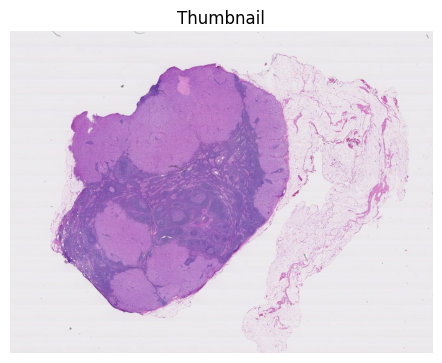

In [22]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import openslide

# Load and display thumbnail image just to see
thumbnail_img = Image.open(dataset_folder_path+tumor_110_thumbnail)
thumb_width, thumb_height = thumbnail_img.size

# Plot both images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Thumbnail")
plt.imshow(thumbnail_img)
plt.axis("off")
plt.show()

In [23]:
def extract_wsi_patch_from_thumbnail_coords(thumb_x, thumb_y, wsi_path, thumbnail_width=1024, thumbnail_height=779, patch_size=512):

    slide = openslide.OpenSlide(wsi_path)

    # Calculate scaling factor (WSI per pixel in thumbnail)
    scale_x = wsi_width / thumbnail_height
    scale_y = wsi_height / thumbnail_height

    # Translate thumbnail pixel to WSI coordinates
    center_x = int(thumb_x * scale_x)
    center_y = int(thumb_y * scale_y)

    # Calculate top-left of patch
    half_size = patch_size // 2
    top_left_x = max(center_x - half_size, 0)
    top_left_y = max(center_y - half_size, 0)

    # Extract region from WSI
    patch = slide.read_region((top_left_x, top_left_y), 0, (patch_size, patch_size))

    return patch

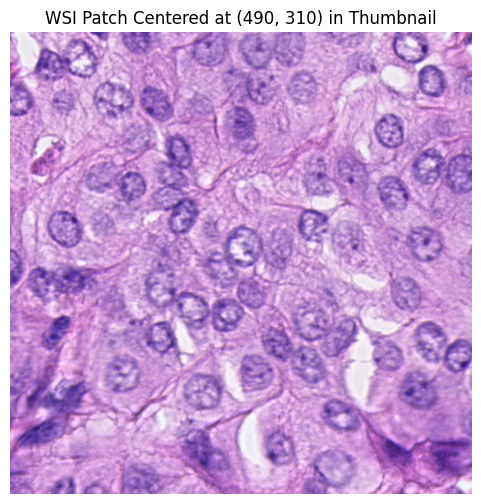

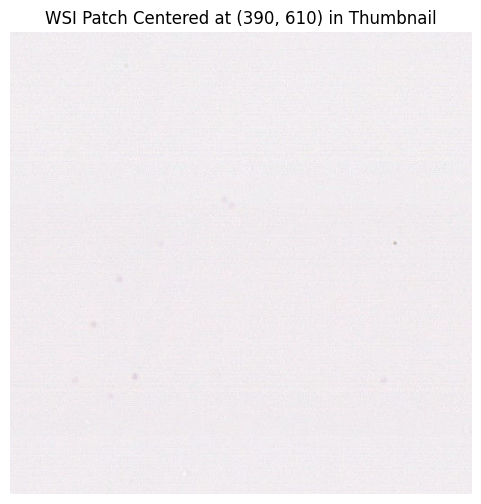

In [24]:
thumb_x=490
thumb_y=310
zoomed_patch = extract_wsi_patch_from_thumbnail_coords(thumb_x, thumb_y, wsi_path=dataset_folder_path + tumor_110_WSI)

# Plot the result
plt.figure(figsize=(6, 6))
plt.imshow(zoomed_patch)
plt.title(f"WSI Patch Centered at ({thumb_x}, {thumb_y}) in Thumbnail")
plt.axis("off")
plt.show()

thumb_x=390
thumb_y=610
zoomed_patch = extract_wsi_patch_from_thumbnail_coords(thumb_x, thumb_y, wsi_path=dataset_folder_path + tumor_110_WSI)

# Plot the result
plt.figure(figsize=(6, 6))
plt.imshow(zoomed_patch)
plt.title(f"WSI Patch Centered at ({thumb_x}, {thumb_y}) in Thumbnail")
plt.axis("off")
plt.show()